# 1. Data Importing

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker = yf.Ticker("RELIANCE.NS")
hist = ticker.history(period="max")
print(hist.index.min(),hist.index.max())

1996-01-01 00:00:00+05:30 2025-09-23 00:00:00+05:30


In [3]:
df=yf.download("RELIANCE.NS",period="max",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [4]:
print("Raw Data",df.shape)
df.sample(5)

Raw Data (7464, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2017-05-05,291.050964,303.615601,312.553223,302.872711,311.238861,15598448
1999-03-05,7.687629,10.903710,11.242889,10.818022,10.967975,175151024
2011-02-28,197.431519,220.411331,227.280258,219.439850,221.771393,22487428
2000-08-14,17.737392,23.517595,23.696112,23.014183,23.492603,37143638
2011-08-05,163.659973,181.037872,182.752258,178.066299,182.752258,26222826


# 2. Data Preprocessing

In [5]:
df.columns=['Adj Close','Close','High','Low','Open','Volume']
df.sample(5)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2006-01-24,68.236198,79.255501,81.604195,78.741188,81.147026,98982821
2007-07-03,171.474319,195.130035,195.764343,191.564133,191.564133,23453510
2021-02-25,972.315247,989.617188,993.147644,956.689148,958.073669,34855693
2008-03-24,220.984192,251.470062,252.550125,242.915344,246.869827,26119935
2013-05-10,172.261703,185.826691,187.552505,184.969513,186.226715,9081731


In [6]:
beginning_cols=['Open','Close','Adj Close']
later_cols=[c for c in df.columns if c not in beginning_cols]
df=df[beginning_cols+later_cols]

In [7]:
df=df.reset_index()
df.columns

Index(['Date', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'Volume'], dtype='object')

In [8]:
df.sample(5)

,Date,Open,Close,Adj Close,High,Low,Volume
3849,2011-01-28,216.011108,208.696442,186.938004,216.216827,206.182022,33855702
591,1998-04-07,13.174423,13.235118,9.040643,13.388642,13.074455,120966571
5446,2017-07-26,366.693146,370.933350,358.409515,372.567719,365.984528,21954323
2511,2005-08-26,49.944988,49.895004,42.957840,50.262749,49.527264,50759283
840,1999-03-22,9.361338,9.168542,6.464253,9.425603,9.047151,52939461


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7464 non-null   datetime64[ns]
 1   Open       7464 non-null   float64       
 2   Close      7464 non-null   float64       
 3   Adj Close  7464 non-null   float64       
 4   High       7464 non-null   float64       
 5   Low        7464 non-null   float64       
 6   Volume     7464 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.3 KB


In [10]:
df.describe()

,Date,Open,Close,Adj Close,High,Low,Volume
count,7464,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7.464000e+03
mean,2010-09-09 08:10:36.655948544,346.549586,346.284081,334.151864,350.317480,342.534749,5.848913e+07
min,1996-01-01 00:00:00,5.462565,5.487558,3.449042,5.487558,5.428648,0.000000e+00
25%,2003-02-24 18:00:00,25.599083,25.559811,19.643190,25.988247,25.167076,1.339710e+07
50%,2010-08-10 12:00:00,199.524544,199.284523,183.156685,201.838943,196.764404,2.362658e+07
75%,2018-03-06 06:00:00,426.553368,425.804749,411.428284,430.879303,421.878822,6.085093e+07
max,2025-09-23 00:00:00,1604.449951,1600.900024,1589.138184,1608.800049,1585.500000,1.448889e+09
std,NaN,423.315554,423.091816,421.979820,427.166920,419.286051,1.013062e+08


In [24]:
df.index

RangeIndex(start=0, stop=7464, step=1)

In [29]:
df.set_index('Date',inplace=True)

In [30]:
df.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-08', '1996-01-09', '1996-01-10',
               '1996-01-11', '1996-01-12',
               ...
               '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-15',
               '2025-09-16', '2025-09-17', '2025-09-18', '2025-09-19',
               '2025-09-22', '2025-09-23'],
              dtype='datetime64[ns]', name='Date', length=7464, freq=None)

Text(0, 0.5, 'Adj Close Price')

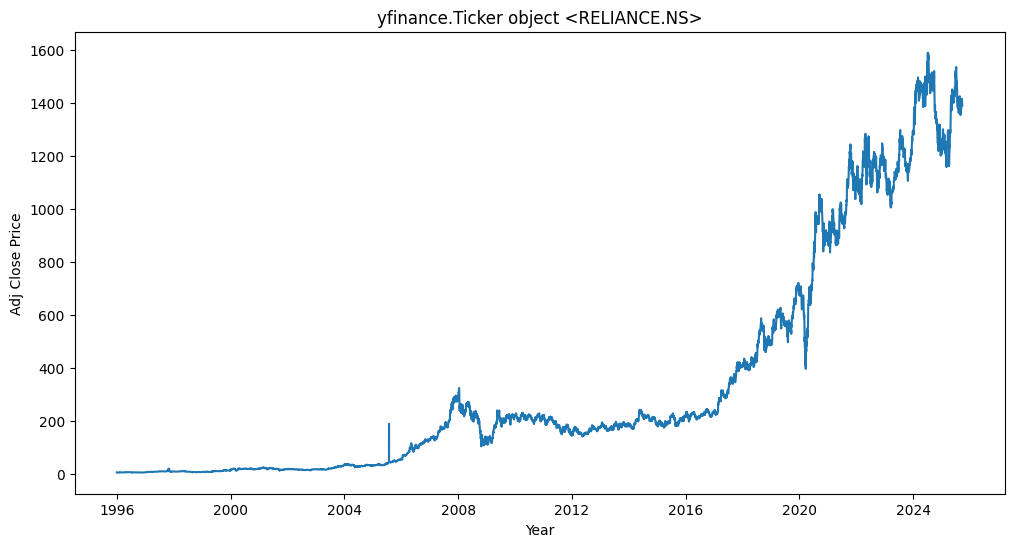

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Adj Close'])
plt.title(ticker)
plt.xlabel("Year")
plt.ylabel("Adj Close Price")